In [ ]:
# intensity Adjustment

<function matplotlib.pyplot.show(*args, **kw)>

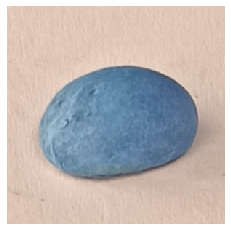

In [75]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Open the image. 
img = cv2.imread('C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel A/A1 (1).jpg') 
  
# Trying 4 gamma values. 
for gamma in [1.2]: 
      
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
  
    # Save edited images. 
    cv2.imwrite('a Intensity'+str(gamma)+'.jpg', gamma_corrected)

plt.axis("off")
plt.imshow(img)
plt.show

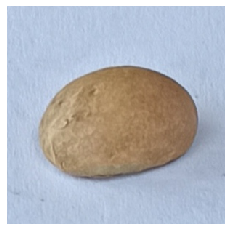

In [23]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Open the image. 
img = mpimg.imread('C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel A/A1 (1).jpg') 

plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
# GreyScale

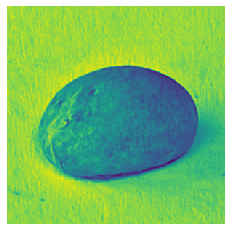

In [78]:
import cv2
from matplotlib import pyplot as plt

# Reading color image
img = cv2.imread('C:/Users/epen/SKRIPSI/a Intensity1.2.jpg')

# Converting color image to grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imwrite('a-greyscale.png',gray)
# Showing the converted image

plt.axis('off')
plt.imshow(gray)
plt.show()

In [ ]:
#Thresholding

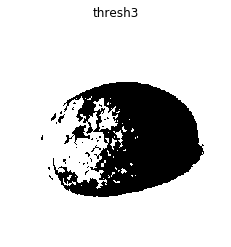

In [80]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/epen/SKRIPSI/a-greyscale.png',0)
ret,thresh3 = cv2.threshold(img,130,255,cv2.THRESH_BINARY)

thresh = ['thresh3']

for i in range(1):
    plt.subplot(1,1,i+1),plt.imshow(eval(thresh[i]),'gray')
    plt.title(thresh[i])

plt.axis('off')
plt.show()

In [ ]:
#Histogram

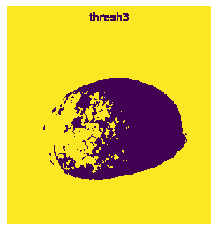

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = cv2.imread('C:/Users/epen/SKRIPSI/a-Threshold.png',0)

equ = cv2.equalizeHist(img)
  
# stacking images side-by-side
res = np.hstack((img, equ))
cv2.imwrite('a-Histogram.png',equ)
# show image input vs output
plt.axis('off')
plt.imshow(equ)
plt.show()

(array([31857.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

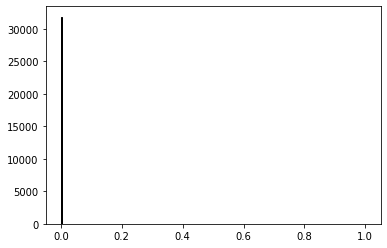

In [91]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/epen/SKRIPSI/a-Histogram.png')
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram

In [ ]:
#Ekstrasi Fitur

In [176]:
import numpy as np 
import cv2 
import os
import re

# -------------------- Utility function ------------------------
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder 
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename), end="\r")
        

# -------------------- Load Dataset ------------------------
 
dataset_dir = r"C:\Users\epen\SKRIPSI\Sampel Kopi"

imgs = [] #list image matrix 
labels = []
descs = []
for folder in os.listdir(dataset_dir):
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1
        for i, filename in enumerate(sub_folder_files):
            img = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            h, w = gray.shape
            ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            crop = gray[ymin:ymax, xmin:xmax]
            
            labels.append(normalize_label(os.path.splitext(filename)[0]))
            descs.append(normalize_desc(folder, sub_folder))
            
            print_progress(i, len_sub_folder, folder, sub_folder, filename)

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\epen\\SKRIPSI\\Sampel Kopi\\Sampel A\\A1 (1).jpg'

In [139]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [159]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("glcm_coffee_dataset.csv")

In [183]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
import pandas as pd

img = io.imread('C:/Users/epen/SKRIPSI/a-Histogram.png')

gray = color.rgb2gray(img)
image = img_as_ubyte(gray)

bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
inds = np.digitize(image, bins)

max_value = inds.max()+1
matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)

# GLCM properties
def contrast_feature(matrix_coocurrence):
	contrast = greycoprops(matrix_coocurrence, 'contrast')
	return "Contrast = ", contrast

def dissimilarity_feature(matrix_coocurrence):
	dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')	
	return "Dissimilarity = ", dissimilarity

def homogeneity_feature(matrix_coocurrence):
	homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
	return "Homogeneity = ", homogeneity

def energy_feature(matrix_coocurrence):
	energy = greycoprops(matrix_coocurrence, 'energy')
	return "Energy = ", energy

def correlation_feature(matrix_coocurrence):
	correlation = greycoprops(matrix_coocurrence, 'correlation')
	return "Correlation = ", correlation

def asm_feature(matrix_coocurrence):
	asm = greycoprops(matrix_coocurrence, 'ASM')
	return "ASM = ", asm

print(contrast_feature(matrix_coocurrence))
print(dissimilarity_feature(matrix_coocurrence))
print(homogeneity_feature(matrix_coocurrence))
print(energy_feature(matrix_coocurrence))
print(correlation_feature(matrix_coocurrence))
print(asm_feature(matrix_coocurrence))

glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)
glcm_df.to_csv("glcm_coffee_dataset.csv")

('Contrast = ', array([[5.82207358, 8.15326971, 5.77538451, 7.74605868]]))
('Dissimilarity = ', array([[0.3638796 , 0.50957936, 0.36096153, 0.48412867]]))
('Homogeneity = ', array([[0.97734602, 0.96827522, 0.97752769, 0.96985969]]))
('Energy = ', array([[0.82086008, 0.81501641, 0.82100627, 0.81593114]]))
('Correlation = ', array([[0.92518024, 0.89554851, 0.92576414, 0.90076529]]))
('ASM = ', array([[0.67381127, 0.66425175, 0.6740513 , 0.66574362]]))
